In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
x=np.loadtxt('ex2x.dat')

In [4]:
print(x)
print(len(x))

[2.0658746 2.3684087 2.5399929 2.5420804 2.549079  2.7866882 2.9116825
 3.035627  3.1146696 3.1582389 3.3275944 3.3793165 3.4122006 3.4215823
 3.5315732 3.6393002 3.6732537 3.9256462 4.0498646 4.2483348 4.3440052
 4.3826531 4.4230602 4.6102443 4.6881183 4.9777333 5.0359967 5.0684536
 5.4161491 5.4395623 5.4563207 5.5698458 5.6015729 5.6877617 5.7215602
 5.8538914 6.1978026 6.3510941 6.4797033 6.7383791 6.8637686 7.0223387
 7.0782373 7.1514232 7.4664023 7.5973874 7.7440717 7.7729662 7.8264514
 7.9306356]
50


In [5]:
y=np.loadtxt('ex2y.dat')

In [6]:
print(y)
print(len(y))
print(y.shape)

[0.77918926 0.91596757 0.90538354 0.90566138 0.9389889  0.9668474
 0.96436824 0.91445939 0.93933944 0.96074971 0.89837094 0.91209739
 0.94238499 0.96624578 1.05265    1.0143791  0.95969426 0.96853716
 1.0766065  1.1454978  1.0340625  1.0070009  0.96683648 1.0895919
 1.0634462  1.1237239  1.0323374  1.0874452  1.0702988  1.1606493
 1.0778037  1.1069758  1.0971875  1.1648603  1.1411796  1.0844156
 1.1252493  1.1168341  1.1970789  1.2069462  1.1251046  1.1235672
 1.2132829  1.2522652  1.2497065  1.1799706  1.1897299  1.3029934
 1.2601134  1.2562267 ]
50
(50,)


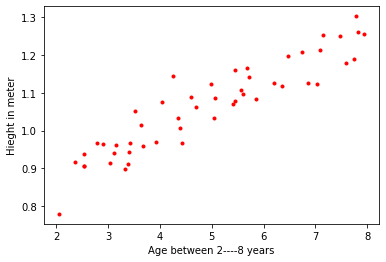

In [7]:
plt.plot(x,y,'r.')
plt.xlabel("Age between 2----8 years")
plt.ylabel("Hieght in meter")
plt.show()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [9]:
x_train.shape

(45,)

In [10]:
y_train.shape

(45,)

In [11]:
x_test.shape

(5,)

In [12]:
y_test.shape

(5,)

In [13]:
X_train=torch.from_numpy(x_train.astype(np.float32))
X_test=torch.from_numpy(x_test.astype(np.float32))

Y_train=torch.from_numpy(y_train.astype(np.float32))
Y_test=torch.from_numpy(y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)
X_train.unsqueeze_(1)
Y_train.unsqueeze_(1)

tensor([[[0.9057]],

        [[1.2601]],

        [[1.1606]],

        [[1.1897]],

        [[1.1070]],

        [[1.0972]],

        [[1.2069]],

        [[1.0070]],

        [[1.1252]],

        [[1.1455]],

        [[1.2133]],

        [[1.2562]],

        [[1.0323]],

        [[0.9668]],

        [[0.9662]],

        [[1.1236]],

        [[0.9685]],

        [[1.1800]],

        [[1.0634]],

        [[1.0896]],

        [[0.9390]],

        [[1.1649]],

        [[1.0526]],

        [[1.0778]],

        [[0.8984]],

        [[1.0703]],

        [[1.2497]],

        [[1.1412]],

        [[1.0766]],

        [[1.0341]],

        [[1.1237]],

        [[0.9644]],

        [[0.9145]],

        [[1.3030]],

        [[0.9160]],

        [[0.9597]],

        [[0.7792]],

        [[1.0144]],

        [[0.9668]],

        [[0.9121]],

        [[0.9607]],

        [[0.9393]],

        [[0.9424]],

        [[1.2523]],

        [[1.1168]]])

In [14]:
#input_size=X_train.shape
output_size=1
input_size=1
print(input_size)

1


In [15]:
#model creation
model=nn.Linear(input_size,output_size)

In [16]:
#loss function
loss=nn.MSELoss()

In [17]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


In [18]:
#now traing loop
los=[]
iterations=300
for epoch in range(iterations):
    y_pred=model(X_train)
    l=loss(Y_train,y_pred)
    los.append(l)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 1==0:
        [w,b]=model.parameters()
        print(f'epoch{epoch+1}: w={w[0][0].item():.3f},loss={l:.3f}')

C:\Users\shehz\Desktop\new enviroment\envir1\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([45, 1])) that is different to the input size (torch.Size([45, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch1: w=-0.343,loss=23.388
epoch2: w=-0.119,loss=4.707
epoch3: w=-0.019,loss=0.964
epoch4: w=0.025,loss=0.215
epoch5: w=0.045,loss=0.065
epoch6: w=0.054,loss=0.034
epoch7: w=0.058,loss=0.028
epoch8: w=0.060,loss=0.027
epoch9: w=0.060,loss=0.027
epoch10: w=0.060,loss=0.027
epoch11: w=0.061,loss=0.027
epoch12: w=0.060,loss=0.027
epoch13: w=0.060,loss=0.027
epoch14: w=0.060,loss=0.026
epoch15: w=0.060,loss=0.026
epoch16: w=0.060,loss=0.026
epoch17: w=0.060,loss=0.026
epoch18: w=0.060,loss=0.026
epoch19: w=0.060,loss=0.026
epoch20: w=0.059,loss=0.026
epoch21: w=0.059,loss=0.026
epoch22: w=0.059,loss=0.026
epoch23: w=0.059,loss=0.026
epoch24: w=0.059,loss=0.026
epoch25: w=0.059,loss=0.026
epoch26: w=0.059,loss=0.026
epoch27: w=0.059,loss=0.026
epoch28: w=0.058,loss=0.026
epoch29: w=0.058,loss=0.026
epoch30: w=0.058,loss=0.026
epoch31: w=0.058,loss=0.026
epoch32: w=0.058,loss=0.026
epoch33: w=0.058,loss=0.026
epoch34: w=0.058,loss=0.025
epoch35: w=0.058,loss=0.025
epoch36: w=0.057,loss=0.0

In [19]:
[w1,w2]=model.parameters()

In [21]:
w2

Parameter containing:
tensor([0.8850], requires_grad=True)

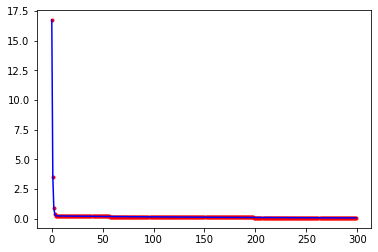

In [105]:
with torch.no_grad():
    plt.plot(los,'r.')
    plt.plot(los,'b')
    plt.show()
    

In [107]:
X_test.unsqueeze_(1)
print("predicting on test samples",model(X_test[1]))


predicting on test samples tensor([1.1180], grad_fn=<AddBackward0>)


In [108]:
print("and the actual value ",Y_test[1])

and the actual value  tensor([1.0844])
